In [2]:
from sklearn import linear_model as lm
import numpy as np, pandas as pd, os, math
from prettytable import PrettyTable
from matplotlib import pyplot as plt

In [3]:
# -------------------- Globals and Configs -------------------- #
feature_names = list()
for index in range(1, 6):
    feature_names.extend(["Suit"+str(index), "Rank"+str(index)])

feature_names.append('class')


training_input_file = os.path.abspath('../datasets/csv/train.csv')
testing_input_file = os.path.abspath('../datasets/csv/test.csv')

np.random.seed(666)     # seed for reproducible results

# To store configs
class myConfigs:
    features = 0
    classes = 0


config = myConfigs()

+----------+-------+
|  Config  | Value |
+----------+-------+
| features |   10  |
| classes  |   10  |
+----------+-------+


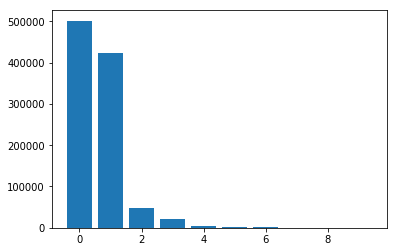

In [4]:
# -------------------- Data -------------------- #

train_data = pd.read_csv(training_input_file, names=feature_names)
test_data = pd.read_csv(testing_input_file, names=feature_names)

# Get features of data
config.features = len(train_data.columns) - 1
config.classes = len(set(train_data['class']))

# Shuffle training data
train_data = train_data.sample(frac=1).reset_index(drop=True)

# Seperate data and classes
train_y = np.array(train_data['class'])
train_x = np.array(train_data.drop('class', 1))

test_y = np.array(test_data['class'])
test_x = np.array(test_data.drop('class', 1))

if __name__ == '__main__':
    tab = PrettyTable(['Config', 'Value'])
    configs = vars(config)

    for key in configs:
        tab.add_row([key, configs[key]])
    print(tab)

test_y_l = list(test_y)
plt.bar(list(range(config.classes)), [test_y_l.count(int(x)) for x in range(config.classes)])
plt.show()

In [5]:
# -------------------- Model -------------------- #
model = lm.LinearRegression()
trainedModel = model.fit(train_x, train_y)

predictions = model.predict(test_x)

In [6]:
avgError = sum([math.fabs(x-y) for x, y in zip(predictions, test_y)]) / len(predictions)
print("Average error :", avgError)

rmsError = sum([(x-y)**2 for x, y in zip(predictions, test_y)]) / len(predictions)
rmsError = math.sqrt(rmsError)
print("RMSE :", rmsError)

Average error : 0.6183909469152787
RMSE : 0.7734871585310373


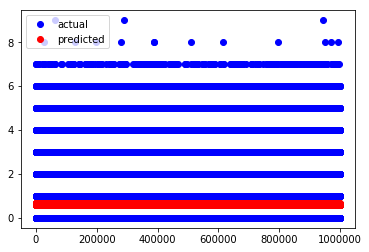

In [7]:
plt.plot(test_y, 'bo', label='actual')
plt.plot(predictions, 'ro', label='predicted')
plt.legend()
plt.show()

In [8]:
model.score(train_x, train_y)

0.0002948116018505198

In [9]:
preds = predictions
confMat = [[0] * config.classes for x in range(config.classes)]
acc = 0

for i in range(len(preds)):
    predLabel = int(round(preds[i]))
    actLabel = int(round(test_y[i]))
    confMat[actLabel][predLabel] += 1
    if predLabel == actLabel:
        acc += 1

header = [""]
for l in range(config.classes):
    header.append("Pred " + str(l))
    
tab = PrettyTable(header)
l = 0
for c in confMat:
    tab.add_row(["Real " + str(l)] + c)
    l += 1

print(tab)
print("Accuracy :", acc * 100 / len(preds))

+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
|        | Pred 0 | Pred 1 | Pred 2 | Pred 3 | Pred 4 | Pred 5 | Pred 6 | Pred 7 | Pred 8 | Pred 9 |
+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
| Real 0 |   0    | 501209 |   0    |   0    |   0    |   0    |   0    |   0    |   0    |   0    |
| Real 1 |   0    | 422498 |   0    |   0    |   0    |   0    |   0    |   0    |   0    |   0    |
| Real 2 |   0    | 47622  |   0    |   0    |   0    |   0    |   0    |   0    |   0    |   0    |
| Real 3 |   0    | 21121  |   0    |   0    |   0    |   0    |   0    |   0    |   0    |   0    |
| Real 4 |   0    |  3885  |   0    |   0    |   0    |   0    |   0    |   0    |   0    |   0    |
| Real 5 |   0    |  1996  |   0    |   0    |   0    |   0    |   0    |   0    |   0    |   0    |
| Real 6 |   0    |  1424  |   0    |   0    |   0    |   0    |   0    |   0    |   0    |